<a href="https://colab.research.google.com/github/pp2098/Customer-Churn-Prediction/blob/main/Customer_Churn_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv('cust_chrun.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [97]:
df.shape

(4250, 20)

In [98]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [99]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [100]:
df['total_minutes']=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']+df['total_intl_minutes']
df['total_charge']=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']+df['total_intl_charge']
df['total_calls']=df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']+df['total_intl_calls']

In [101]:
df1=df.drop(['total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',
         'total_night_calls','total_night_charge','total_intl_minutes','total_intl_charge','total_intl_calls','state','area_code'],axis=1)

In [102]:
df1.shape

(4250, 9)

In [103]:
df1.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'number_customer_service_calls', 'churn',
       'total_minutes', 'total_charge', 'total_calls'],
      dtype='object')

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   number_customer_service_calls  4250 non-null   int64  
 5   churn                          4250 non-null   object 
 6   total_minutes                  4250 non-null   float64
 7   total_charge                   4250 non-null   float64
 8   total_calls                    4250 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 299.0+ KB


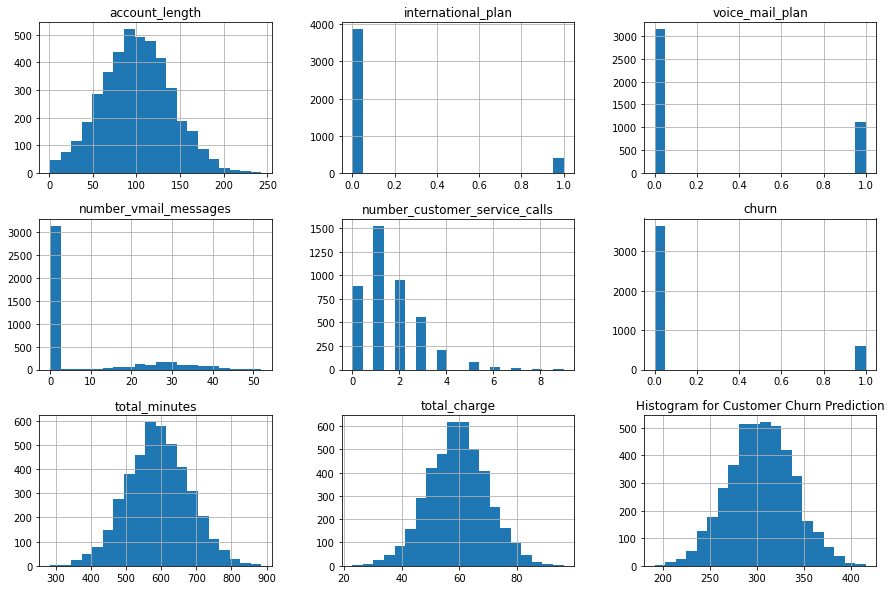

In [117]:
df1.hist(bins=20,figsize=(15,10))
plt.title("Histogram for Customer Churn Prediction")
plt.show()

In [105]:
df1['international_plan']=df1['international_plan'].apply(lambda x:1 if x=='yes' else 0)
df1['voice_mail_plan']=df1['voice_mail_plan'].apply(lambda x:1 if x=='yes' else 0)


In [106]:
df1['churn']=df1['churn'].apply(lambda x:1 if x=='yes' else 0)
df1['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [107]:
X=df1.drop(['churn'],axis=1)
Y=df['churn']

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=101)

In [109]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_train=ss.fit_transform(X_train)
#X_test=ss.transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [111]:
from sklearn import metrics
print("Accuracy score for Logistic Regression Model: ",metrics.accuracy_score(Y_test,lr_pred))

Accuracy score for Logistic Regression Model:  0.8682352941176471


In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
print("Accuracy Score for RF Model: ",metrics.accuracy_score(Y_test,rf_pred))

Accuracy Score for RF Model:  0.9552941176470588


In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
print("Accuracy score for KNN Model: ",metrics.accuracy_score(Y_test,knn_pred))

Accuracy score for KNN Model:  0.8713725490196078


In [116]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)
print("Accuracy Score for DT Model: ",metrics.accuracy_score(Y_test,dt_pred))

Accuracy Score for DT Model:  0.923921568627451


In [118]:
s=pd.DataFrame({'Model Name': ['Logistic Regression','RF','DT','KNN'],
                'Accuracy':[87,96,92,87]})
s

,Model Name,Accuracy
0,Logistic Regression,87
1,RF,96
2,DT,92
3,KNN,87


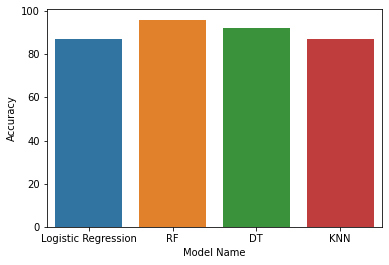

In [119]:
sns.barplot(x='Model Name',y='Accuracy',data=s)